Johnson & Johnson Quarterly Sales (data vs. date)

Amazon Daily Stock Prices (Close vs. Date)

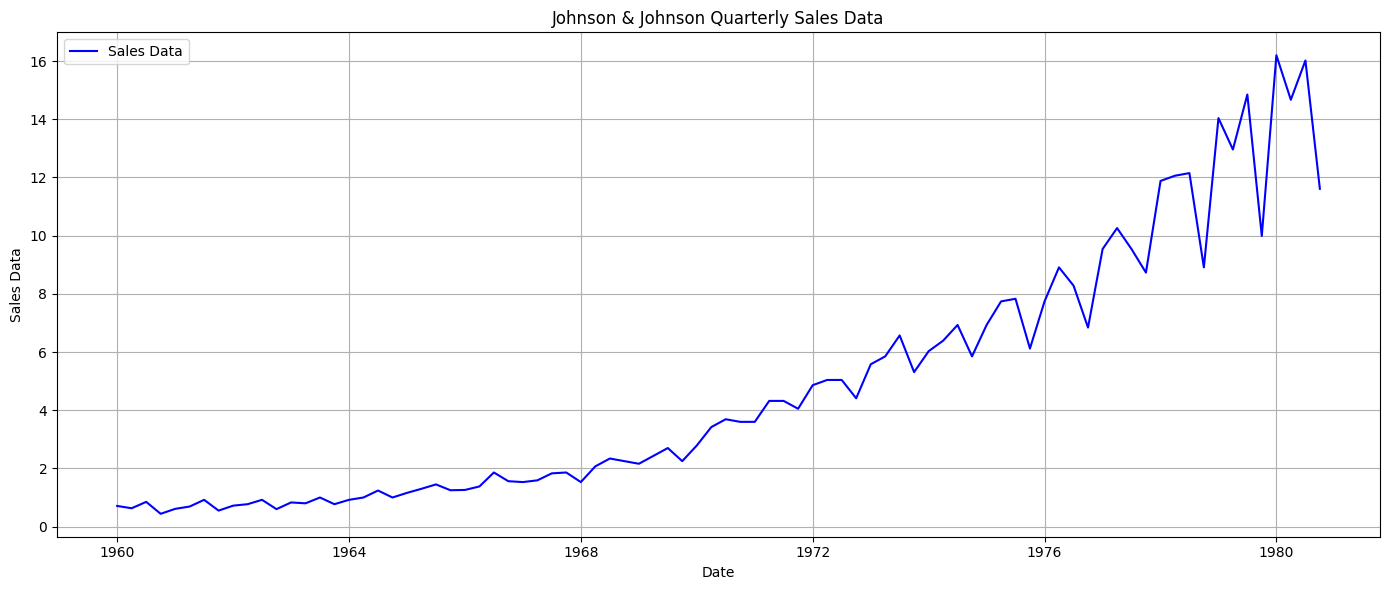

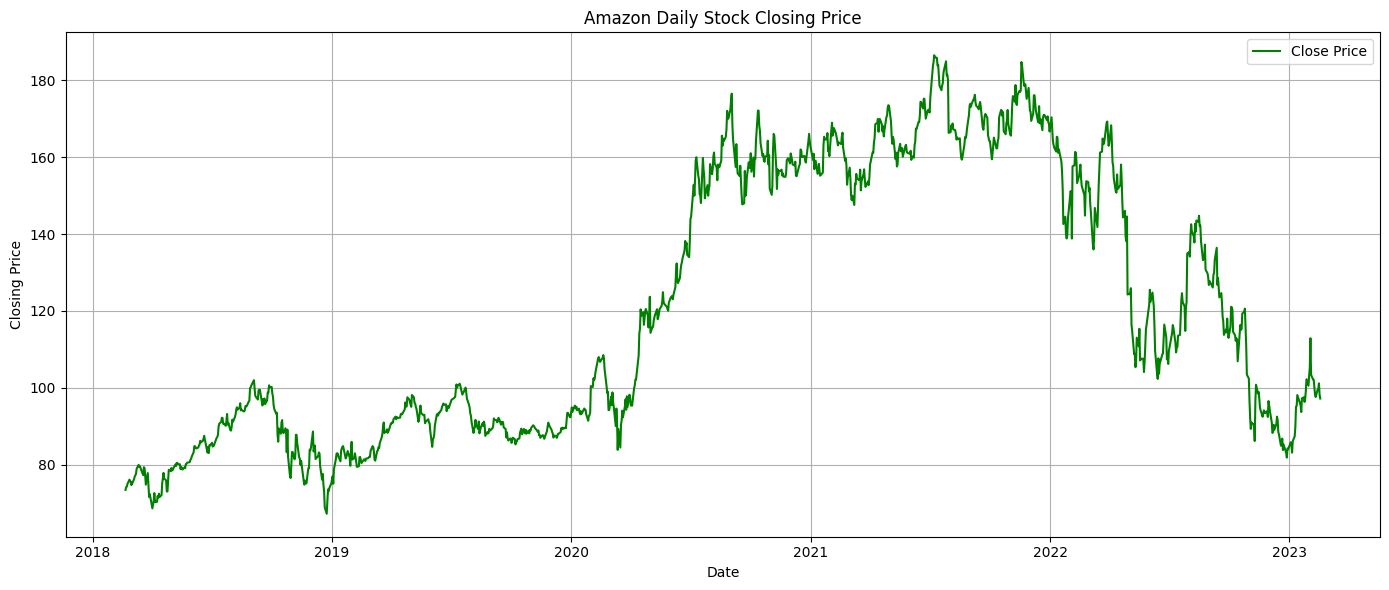

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the Johnson & Johnson dataset
jj_data = pd.read_csv('jj.csv')
jj_data['date'] = pd.to_datetime(jj_data['date'])

# Plot the Johnson & Johnson quarterly sales (data vs date)
plt.figure(figsize=(14, 6))
plt.plot(jj_data['date'], jj_data['data'], label='Sales Data', color='blue')
plt.title('Johnson & Johnson Quarterly Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales Data')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Load the Amazon stock price data
amzn_data = pd.read_csv('AMZN.csv')
amzn_data['Date'] = pd.to_datetime(amzn_data['Date'])

# Plot the Amazon closing stock price (Close vs Date)
plt.figure(figsize=(14, 6))
plt.plot(amzn_data['Date'], amzn_data['Close'], label='Close Price', color='green')
plt.title('Amazon Daily Stock Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

ADF (Augmented Dickey-Fuller) Test, ACF (AutoCorrelation Function), and PACF (Partial AutoCorrelation Function)


📉 ADF Test Summary (Johnson & Johnson Sales):
ADF Statistic: 2.74
p-value: 1.00
Critical Values:
1%: -3.52
5%: -2.90
10%: -2.59

The p-value is greater than 0.05. We fail to reject the null hypothesis that the data is non-stationary.


<Figure size 1400x600 with 0 Axes>

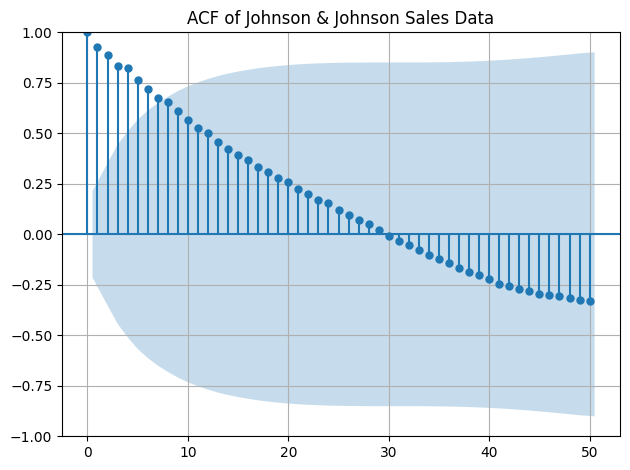

<Figure size 1400x600 with 0 Axes>

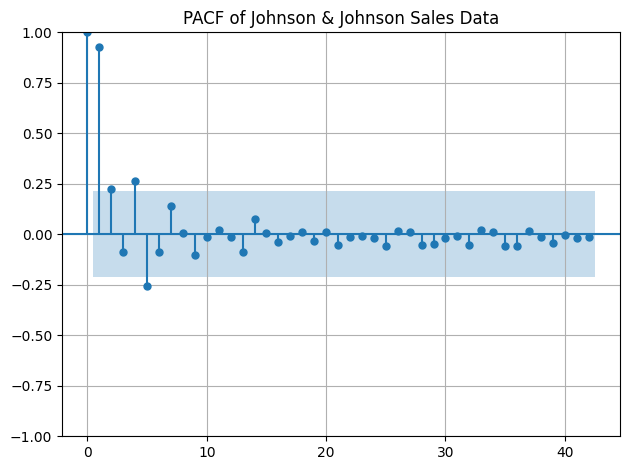

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the Johnson & Johnson sales data
jj_data = pd.read_csv('jj.csv')
jj_data['date'] = pd.to_datetime(jj_data['date'])
jj_data.set_index('date', inplace=True)

# Perform the Augmented Dickey-Fuller (ADF) test
adf_result = adfuller(jj_data['data'])

# ADF Test Results
print("📉 ADF Test Summary (Johnson & Johnson Sales):")
print(f"ADF Statistic: {adf_result[0]:.2f}")
print(f"p-value: {adf_result[1]:.2f}")
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"{key}: {value:.2f}")

# Interpretation of ADF Test
if adf_result[1] > 0.05:
    print("\nThe p-value is greater than 0.05. We fail to reject the null hypothesis that the data is non-stationary.")
else:
    print("\nThe p-value is less than 0.05. We reject the null hypothesis that the data is non-stationary.")

# Plot the ACF (AutoCorrelation Function)
plt.figure(figsize=(14, 6))
plot_acf(jj_data['data'], lags=50)
plt.title('ACF of Johnson & Johnson Sales Data')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the PACF (Partial AutoCorrelation Function)
plt.figure(figsize=(14, 6))
plot_pacf(jj_data['data'], lags=42)
plt.title('PACF of Johnson & Johnson Sales Data')
plt.grid(True)
plt.tight_layout()
plt.show()

First-order differencing, ADF test on differenced data, Differenced time series plot, ACF and PACF of the differenced data plot

ADF Statistic (Differenced Data): -0.40740976363804615
p-value: 0.9088542416911305
Critical Values:
   1%: -3.524624466842421
   5%: -2.9026070739026064
   10%: -2.5886785262345677


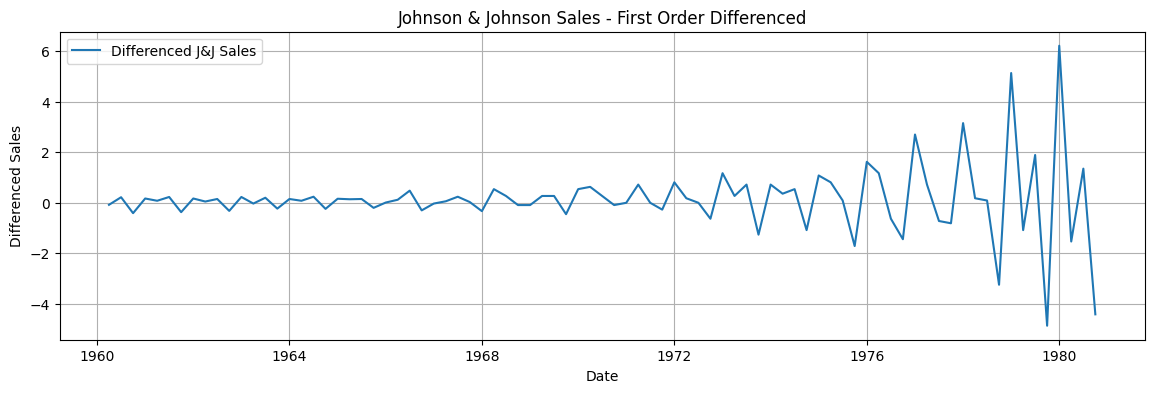

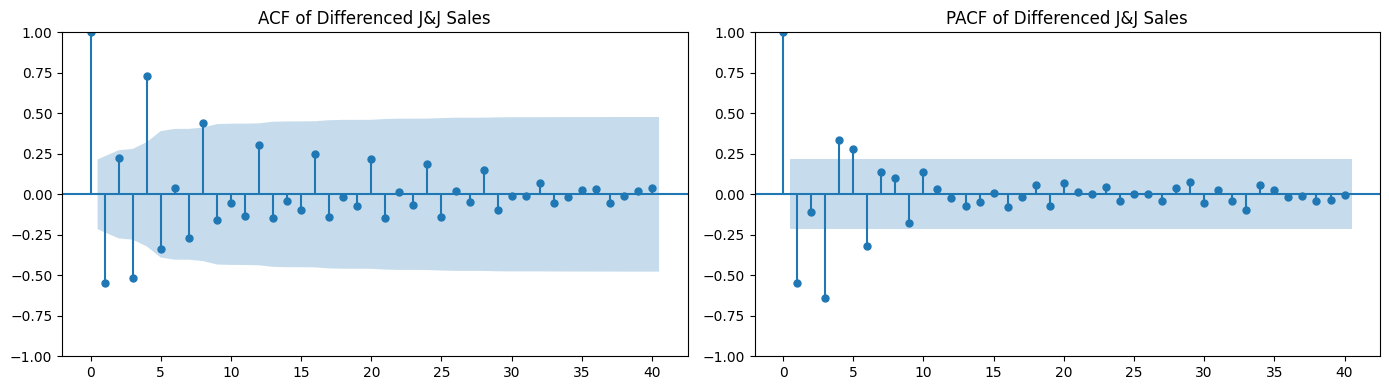

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the data
jj_data = pd.read_csv('jj.csv')
jj_data['date'] = pd.to_datetime(jj_data['date'])
jj_series = jj_data.set_index('date')['data']

# First-order differencing
jj_diff = jj_series.diff().dropna()

# ADF Test on differenced series
adf_diff_result = adfuller(jj_diff)

print("ADF Statistic (Differenced Data):", adf_diff_result[0])
print("p-value:", adf_diff_result[1])
print("Critical Values:")
for key, value in adf_diff_result[4].items():
    print(f"   {key}: {value}")

# Plot differenced time series
plt.figure(figsize=(14, 4))
plt.plot(jj_diff, label='Differenced J&J Sales')
plt.title('Johnson & Johnson Sales - First Order Differenced')
plt.xlabel('Date')
plt.ylabel('Differenced Sales')
plt.grid(True)
plt.legend()
plt.show()

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
plot_acf(jj_diff, ax=axes[0], lags=40)
axes[0].set_title('ACF of Differenced J&J Sales')
plot_pacf(jj_diff, ax=axes[1], lags=40, method='ywm')
axes[1].set_title('PACF of Differenced J&J Sales')
plt.tight_layout()
plt.show()

 ARIMA Modelling & Forecast Code

In [ ]:
!pip install numpy==1.24.3 pandas==2.2.2
!pip install --upgrade --force-reinstall pmdarima
!pip install jedi>=0.16

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 74.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 91.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.3
    Uninstalling pandas-2.2.3:
      Successfully uninstalled pandas-2.2.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blosc2 3.2.1 requires numpy>=1.26, but you have numpy 1.24.3 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
pymc 5.21.1 require

  Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached Cython-3.0.12-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.3 kB)
  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached statsmodels-0.14.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.2 kB)
  Using cached urllib3-2.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached setuptools-78.1.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached packaging-24.2-py3-none

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=297.285, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=264.953, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=255.333, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=295.995, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=251.412, Time=0.61 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=252.748, Time=0.84 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=238.454, Time=0.41 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=229.503, Time=0.27 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=259.465, Time=0.48 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=228.486, Time=0.22 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=240.020, Time=0.27 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0]             : AIC=inf, Time=0.21 sec

Best model:  ARIMA(1,1,3)(0,0,0)[0] intercept
Total fit time: 5.348 seconds
Best ARIMA model:                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   84
Model:               SARIMAX(1, 1, 3)   Log Likelihood                -108.243
Date:                Sun, 06 Apr 2025   AIC                            228.486
Time:                        09:20:08   BIC                            242.999
Sample:                             0   HQIC                           234.316
                                 - 84                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3428      0.102      3.353      0.001

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

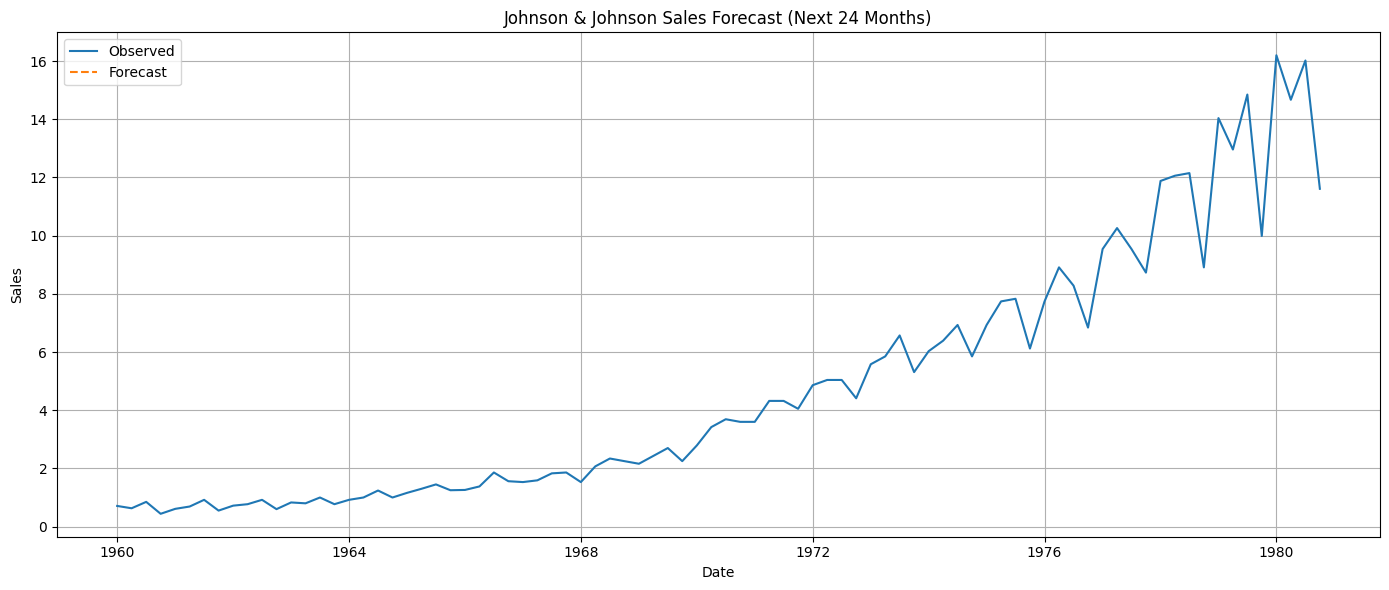

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# Load and prepare data
jj_data = pd.read_csv('jj.csv')
jj_data['date'] = pd.to_datetime(jj_data['date'])
jj_series = jj_data.set_index('date')['data']

# Use auto_arima to determine optimal p, d, q
stepwise_model = auto_arima(jj_series,
                            start_p=0, start_q=0,
                            max_p=5, max_q=5,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)

print("Best ARIMA model:", stepwise_model.summary())

# Fit ARIMA model with best parameters
best_order = stepwise_model.order
model = ARIMA(jj_series, order=best_order)
model_fit = model.fit()

# Forecast next 24 months
forecast = model_fit.forecast(steps=24)
forecast_index = pd.date_range(start=jj_series.index[-1] + pd.DateOffset(months=3), periods=24, freq='QE')
forecast_series = pd.Series(forecast, index=forecast_index)

# Plot actual and forecasted values
plt.figure(figsize=(14, 6))
plt.plot(jj_series, label='Observed')
plt.plot(forecast_series, label='Forecast', linestyle='--')
plt.title('Johnson & Johnson Sales Forecast (Next 24 Months)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Model Evaluation & Residual Diagnostics Code

MAE: 0.61
RMSE: 0.92


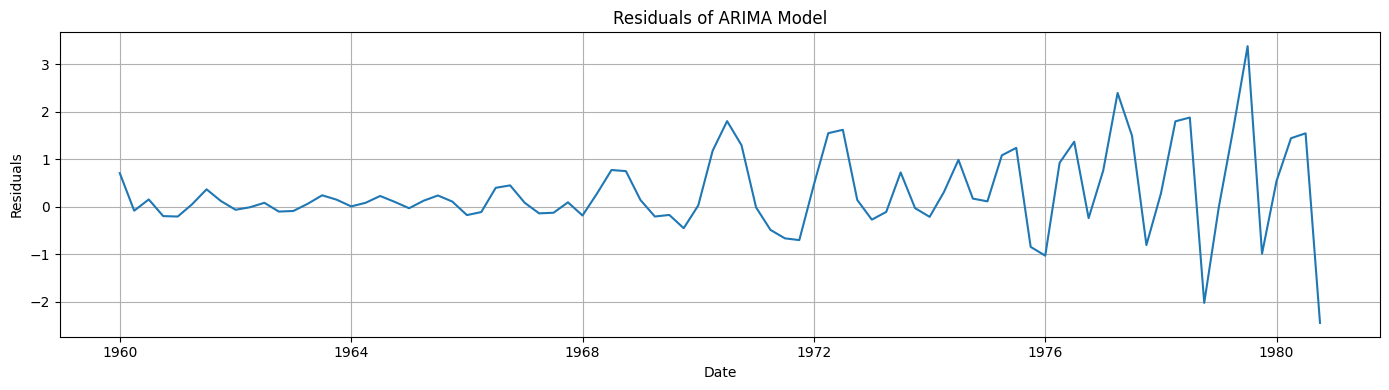

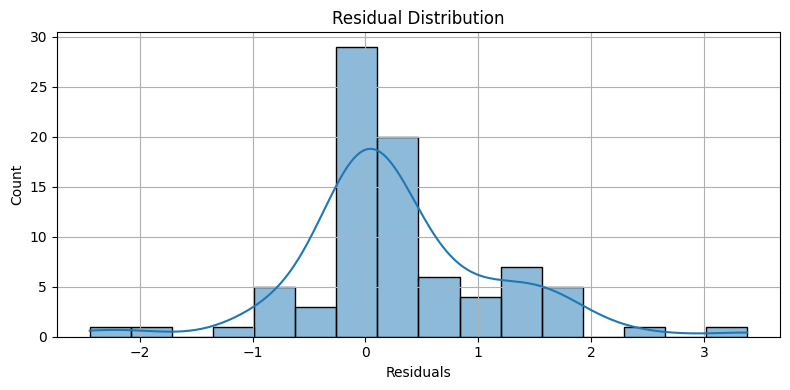

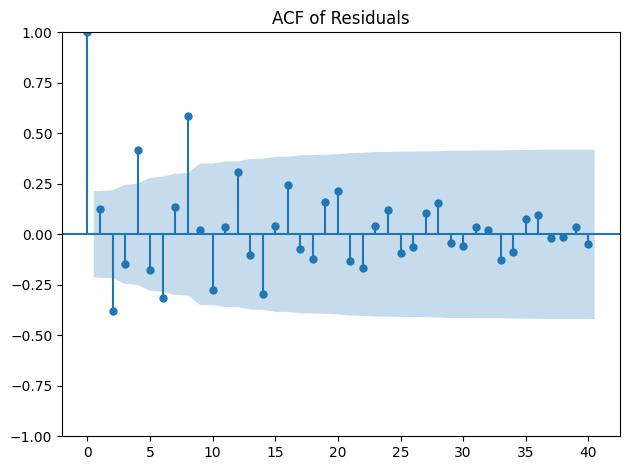

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import seaborn as sns

# Evaluation metrics on the training set (in-sample)
residuals = model_fit.resid

# Calculate MAE and RMSE

mae = mean_absolute_error(jj_series[best_order[1]:], model_fit.fittedvalues[best_order[1]:])
rmse = np.sqrt(mean_squared_error(jj_series[best_order[1]:], model_fit.fittedvalues[best_order[1]:]))


print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# Plot residuals
plt.figure(figsize=(14, 4))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()

# Histogram and density plot of residuals
plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()

# ACF plot of residuals to check for autocorrelation
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(residuals, lags=40)
plt.title('ACF of Residuals')
plt.tight_layout()
plt.show()

ARIMA Model for Amazon Stock Price

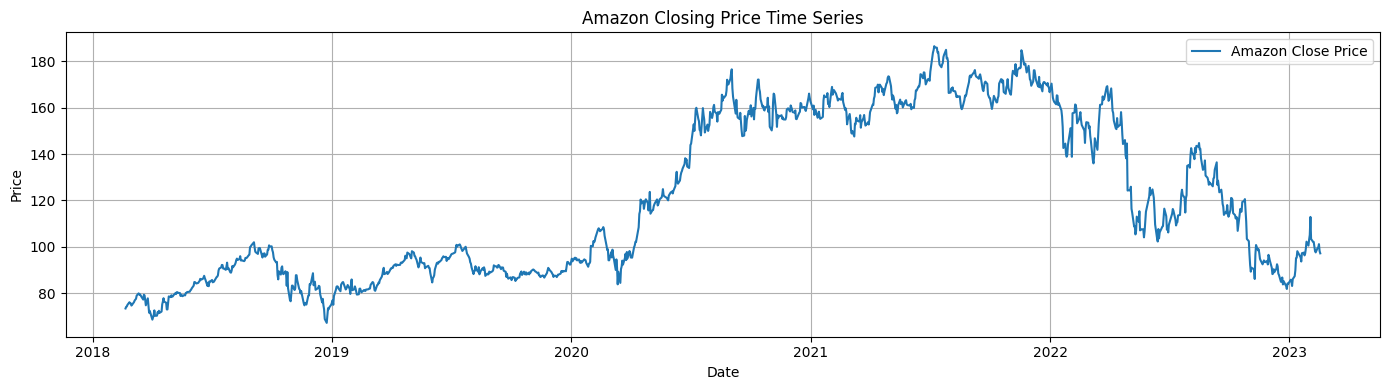

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6132.580, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6133.913, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6133.946, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6130.639, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6133.629, Time=0.68 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.075 seconds
Best ARIMA model for Amazon:                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1259
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -3064.319
Date:                Sun, 06 Apr 2025   AIC                           6130.639
Time:                        09:38:47   BIC                           6135.776
Sample:                             0   HQIC                          6132.569
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         7.6435      0.155     4

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

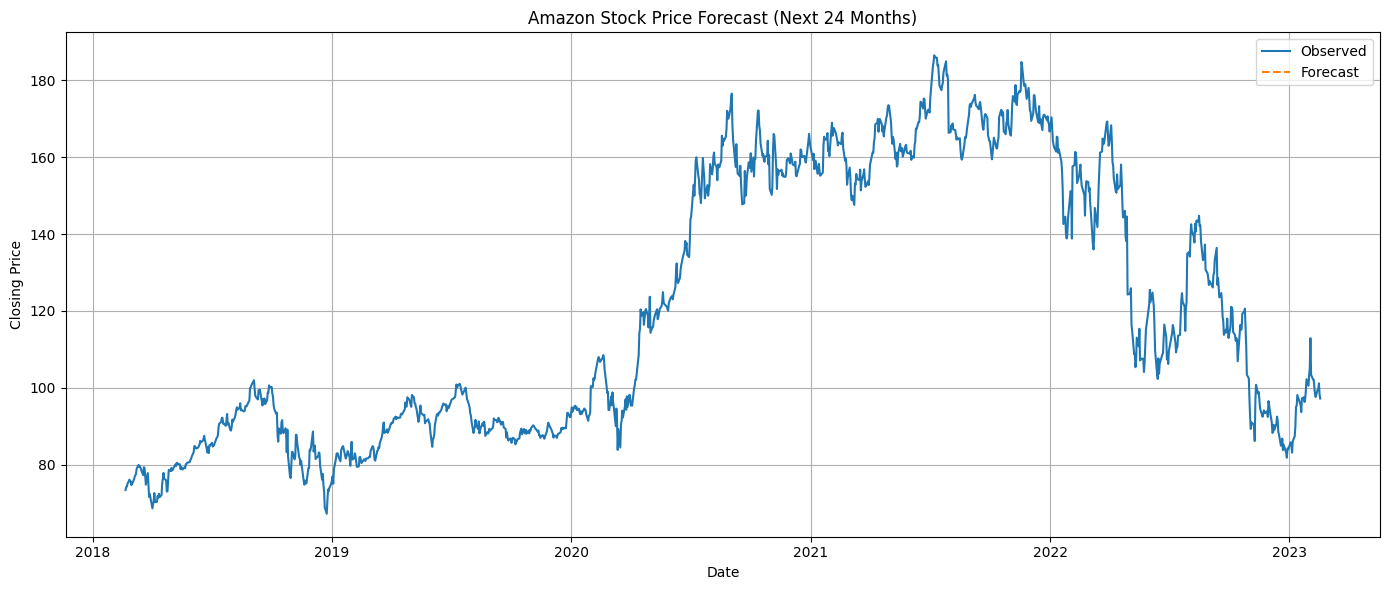

Amazon ARIMA Model MAE: 1.92
Amazon ARIMA Model RMSE: 2.76


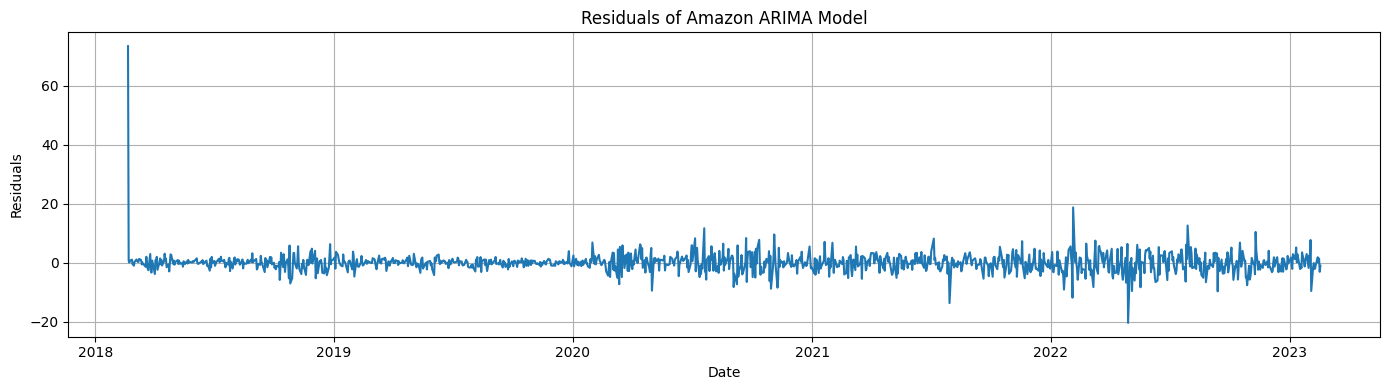

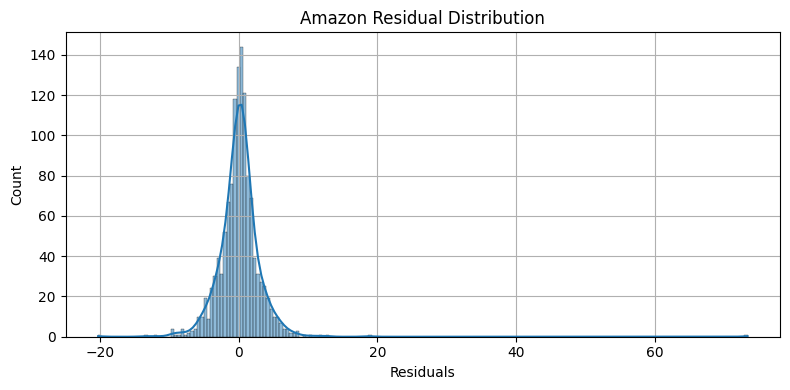

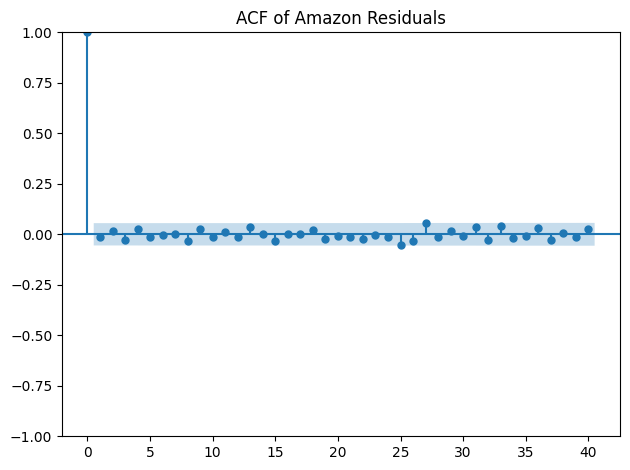

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

# Load and prepare AMZN data
amzn_data = pd.read_csv('AMZN.csv')
amzn_data['Date'] = pd.to_datetime(amzn_data['Date'])
amzn_series = amzn_data.set_index('Date')['Close']

# Initial plot
plt.figure(figsize=(14, 4))
plt.plot(amzn_series, label='Amazon Close Price')
plt.title('Amazon Closing Price Time Series')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Use auto_arima to find best (p,d,q) parameters
stepwise_model_amzn = auto_arima(amzn_series,
                                  start_p=0, start_q=0,
                                  max_p=5, max_q=5,
                                  seasonal=False,
                                  trace=True,
                                  error_action='ignore',
                                  suppress_warnings=True,
                                  stepwise=True)

print("Best ARIMA model for Amazon:", stepwise_model_amzn.summary())
best_order_amzn = stepwise_model_amzn.order

# Fit ARIMA model
model_amzn = ARIMA(amzn_series, order=best_order_amzn)
model_fit_amzn = model_amzn.fit()

# Forecast next 24 months
forecast_amzn = model_fit_amzn.forecast(steps=24)
forecast_index_amzn = pd.date_range(start=amzn_series.index[-1] + pd.DateOffset(months=1), periods=24, freq='M')
forecast_series_amzn = pd.Series(forecast_amzn, index=forecast_index_amzn)

# Plot observed vs forecast
plt.figure(figsize=(14, 6))
plt.plot(amzn_series, label='Observed')
plt.plot(forecast_series_amzn, label='Forecast', linestyle='--')
plt.title('Amazon Stock Price Forecast (Next 24 Months)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Model Evaluation
residuals_amzn = model_fit_amzn.resid

mae_amzn = mean_absolute_error(amzn_series[best_order_amzn[1]:], model_fit_amzn.fittedvalues[best_order_amzn[1]:])
rmse_amzn = np.sqrt(mean_squared_error(amzn_series[best_order_amzn[1]:], model_fit_amzn.fittedvalues[best_order_amzn[1]:]))

print(f"Amazon ARIMA Model MAE: {mae_amzn:.2f}")
print(f"Amazon ARIMA Model RMSE: {rmse_amzn:.2f}")

# Residual Plot
plt.figure(figsize=(14, 4))
plt.plot(residuals_amzn)
plt.title('Residuals of Amazon ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()

# Histogram of residuals
plt.figure(figsize=(8, 4))
sns.histplot(residuals_amzn, kde=True)
plt.title('Amazon Residual Distribution')
plt.xlabel('Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()

# ACF of residuals
plot_acf(residuals_amzn, lags=40)
plt.title('ACF of Amazon Residuals')
plt.tight_layout()
plt.show()

LSTM Model for Johnson & Johnson Sales Data

In [ ]:
!pip install numpy==1.24.3
!pip install tensorflow==2.12.0

  Using cached tensorflow-2.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached gast-0.4.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
  Using cached protobuf-4.25.6-cp37-abi3-manylinux2014_x86_64.whl.metadata (541 bytes)
  Using cached tensorboard-2.12.3-py3-none-any.whl.metadata (1.8 kB)
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached wrapt-1.14.1-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
  Using cached jax-0.5.3-py3-none-any.whl.metadata (22 kB)
  Using cached jaxlib-0.5.3-cp311-cp311-manylinux2014_x86_64.whl.metadata (1

<ipython-input-6-844b1579d952>:67: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  forecast_index = pd.date_range(start=jj_series.index[-1] + pd.DateOffset(months=3), periods=24, freq='Q')


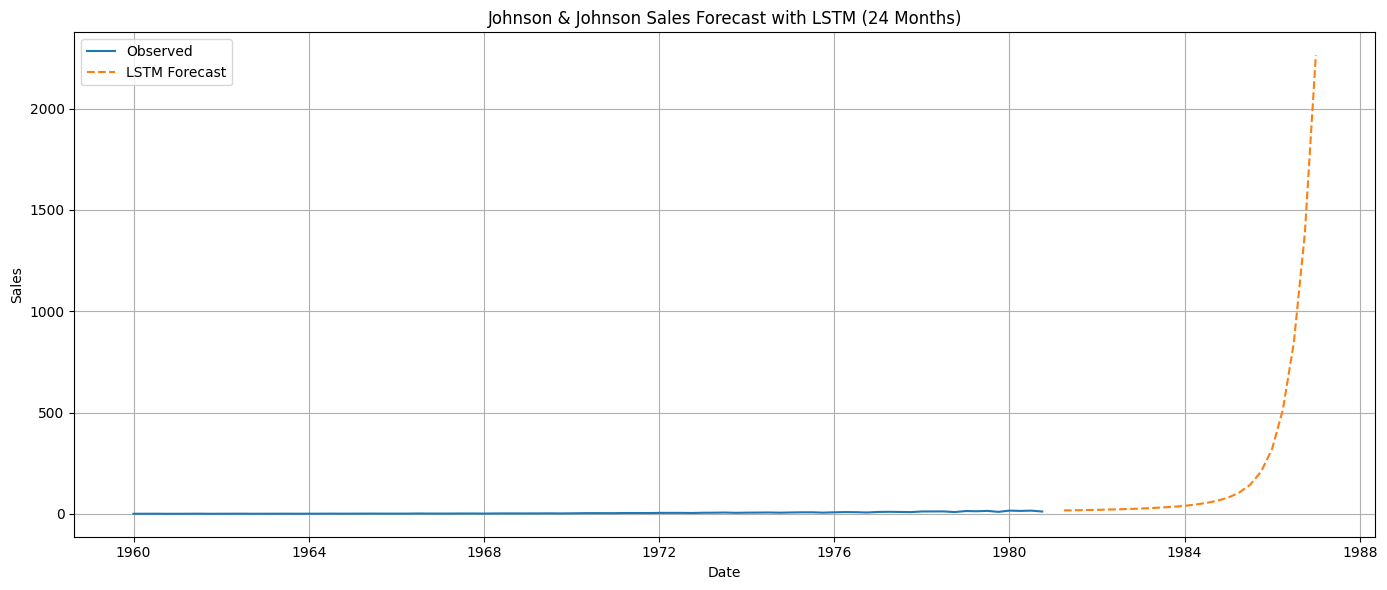

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the JJ dataset
jj_data = pd.read_csv('jj.csv')
jj_data['date'] = pd.to_datetime(jj_data['date'])
jj_series = jj_data.set_index('date')['data']

# Normalize the data
scaler = MinMaxScaler()
scaled_series = scaler.fit_transform(jj_series.values.reshape(-1, 1))

# Prepare data for LSTM
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i - window_size:i])
        y.append(data[i])
    return np.array(X), np.array(y)

window_size = 12  # using 12 time steps (1 year)
X, y = create_sequences(scaled_series, window_size)

# Reshape for LSTM: (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Build LSTM model
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(X.shape[1], 1)),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X, y, epochs=100, verbose=0)

# Forecasting 24 months ahead
forecast_input = scaled_series[-window_size:].reshape(1, window_size, 1)
forecast_output = []

for _ in range(24):

    pred = lstm_model.predict(forecast_input, verbose=0)
    forecast_output.append(pred[0, 0])
    #forecast_input = np.append(forecast_input[:, 1:, :], [[pred]], axis=1) # The original problematic line

    # Reshape pred to match the desired dimensions
    pred_reshaped = pred.reshape(1, 1, 1)

    # Update forecast_input using concatenate
    forecast_input = np.concatenate([forecast_input[:, 1:, :], pred_reshaped], axis=1)




    #pred = lstm_model.predict(forecast_input, verbose=0)
    #forecast_output.append(pred[0, 0])
    #forecast_input = np.append(forecast_input[:, 1:, :], [[pred]], axis=1)

# Inverse transform to original scale
forecast_output = scaler.inverse_transform(np.array(forecast_output).reshape(-1, 1))

# Create date index for forecast
forecast_index = pd.date_range(start=jj_series.index[-1] + pd.DateOffset(months=3), periods=24, freq='QE')
forecast_series = pd.Series(forecast_output.flatten(), index=forecast_index)

# Plot actual vs forecast
plt.figure(figsize=(14, 6))
plt.plot(jj_series, label='Observed')
plt.plot(forecast_series, label='LSTM Forecast', linestyle='--')
plt.title('Johnson & Johnson Sales Forecast with LSTM (24 Months)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

 GRU Model for Johnson & Johnson Sales Data

<ipython-input-8-d06fa3b7f13d>:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  forecast_index = pd.date_range(start=jj_series.index[-1] + pd.DateOffset(months=3), periods=24, freq='Q')


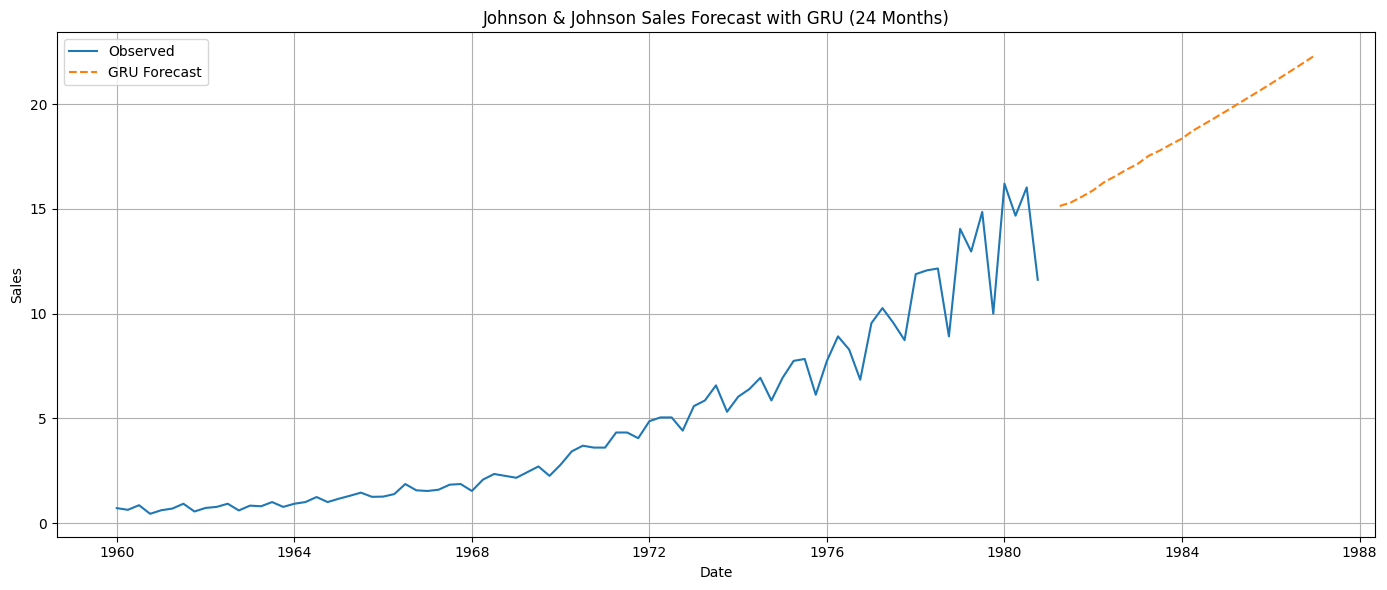

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Load the JJ dataset
jj_data = pd.read_csv('jj.csv')
jj_data['date'] = pd.to_datetime(jj_data['date'])
jj_series = jj_data.set_index('date')['data']

# Normalize the data
scaler = MinMaxScaler()
scaled_series = scaler.fit_transform(jj_series.values.reshape(-1, 1))

# Prepare data for GRU
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i - window_size:i])
        y.append(data[i])
    return np.array(X), np.array(y)

window_size = 12  # using 12 time steps
X, y = create_sequences(scaled_series, window_size)

# Reshape for GRU: (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Build GRU model
gru_model = Sequential([
    GRU(50, activation='relu', input_shape=(X.shape[1], 1)),
    Dense(1)
])

gru_model.compile(optimizer='adam', loss='mse')
gru_model.fit(X, y, epochs=100, verbose=0)

# Forecasting 24 months ahead
forecast_input = scaled_series[-window_size:].reshape(1, window_size, 1)
forecast_output = []

for _ in range(24):
    pred = gru_model.predict(forecast_input, verbose=0)
    forecast_output.append(pred[0, 0])
    forecast_input = np.concatenate([forecast_input[:, 1:, :], pred.reshape(1, 1, 1)], axis=1)
    #forecast_input = np.append(forecast_input[:, 1:, :], [[pred]], axis=1)

# Inverse transform to original scale
forecast_output = scaler.inverse_transform(np.array(forecast_output).reshape(-1, 1))

# Create date index for forecast
forecast_index = pd.date_range(start=jj_series.index[-1] + pd.DateOffset(months=3), periods=24, freq='QE')
forecast_series = pd.Series(forecast_output.flatten(), index=forecast_index)

# Plot actual vs forecast
plt.figure(figsize=(14, 6))
plt.plot(jj_series, label='Observed')
plt.plot(forecast_series, label='GRU Forecast', linestyle='--')
plt.title('Johnson & Johnson Sales Forecast with GRU (24 Months)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

LSTM Model for Amazon Stock Price Data

<ipython-input-11-7782a7a50870>:54: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index_amzn = pd.date_range(start=amzn_series.index[-1] + pd.DateOffset(months=1), periods=24, freq='M')


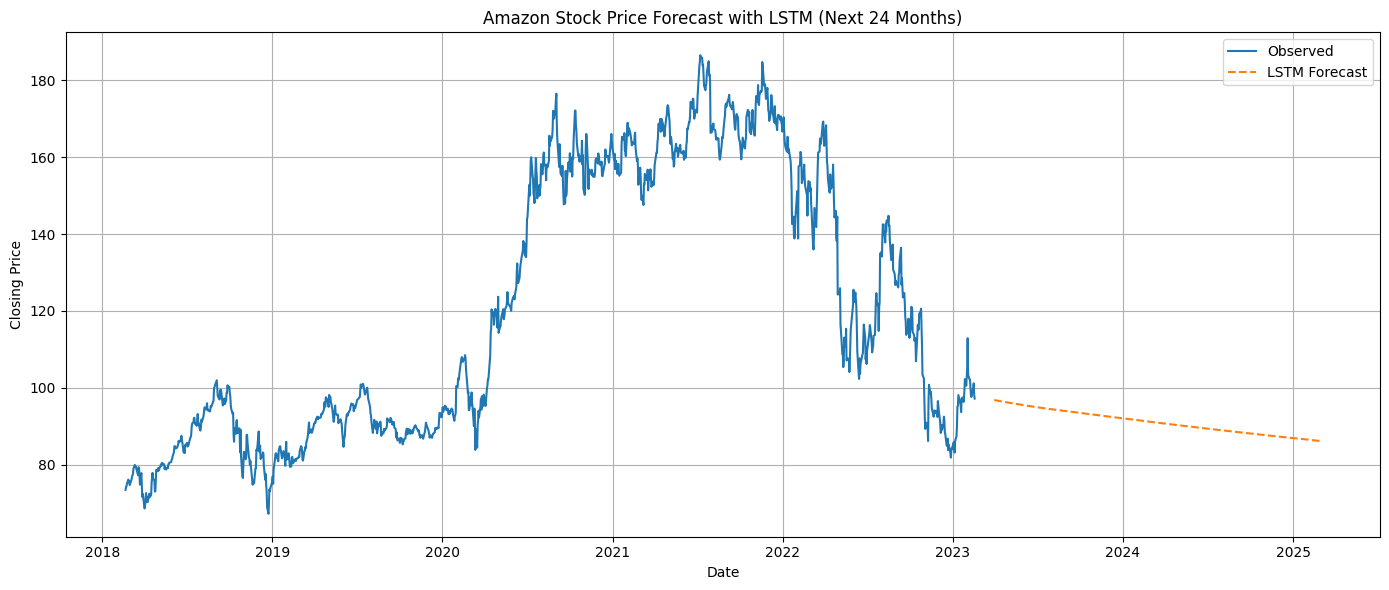

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the AMZN dataset
amzn_data = pd.read_csv('AMZN.csv')
amzn_data['Date'] = pd.to_datetime(amzn_data['Date'])
amzn_series = amzn_data.set_index('Date')['Close']

# Normalize the data
scaler = MinMaxScaler()
scaled_series = scaler.fit_transform(amzn_series.values.reshape(-1, 1))

# Prepare data for LSTM
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i - window_size:i])
        y.append(data[i])
    return np.array(X), np.array(y)

window_size = 12  # using 12 time steps (1 year)
X, y = create_sequences(scaled_series, window_size)

# Reshape for LSTM: (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Build LSTM model
lstm_model_amzn = Sequential([
    LSTM(50, activation='relu', input_shape=(X.shape[1], 1)),
    Dense(1)
])

lstm_model_amzn.compile(optimizer='adam', loss='mse')
lstm_model_amzn.fit(X, y, epochs=100, verbose=0)

# Forecasting 24 months ahead
forecast_input_amzn = scaled_series[-window_size:].reshape(1, window_size, 1)
forecast_output_amzn = []

for _ in range(24):
    pred = lstm_model_amzn.predict(forecast_input_amzn, verbose=0)
    forecast_output_amzn.append(pred[0, 0])
    forecast_input_amzn = np.concatenate([forecast_input_amzn[:, 1:, :], pred.reshape(1, 1, 1)], axis=1)
    #forecast_input_amzn = np.append(forecast_input_amzn[:, 1:, :], [[pred]], axis=1)

# Inverse transform to original scale
forecast_output_amzn = scaler.inverse_transform(np.array(forecast_output_amzn).reshape(-1, 1))

# Create date index for forecast
forecast_index_amzn = pd.date_range(start=amzn_series.index[-1] + pd.DateOffset(months=1), periods=24, freq='ME')
forecast_series_amzn = pd.Series(forecast_output_amzn.flatten(), index=forecast_index_amzn)

# Plot actual vs forecast
plt.figure(figsize=(14, 6))
plt.plot(amzn_series, label='Observed')
plt.plot(forecast_series_amzn, label='LSTM Forecast', linestyle='--')
plt.title('Amazon Stock Price Forecast with LSTM (Next 24 Months)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

GRU Model for Amazon Stock Price Data

<ipython-input-14-1b1c25707c08>:54: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index_amzn = pd.date_range(start=amzn_series.index[-1] + pd.DateOffset(months=1), periods=24, freq='M')


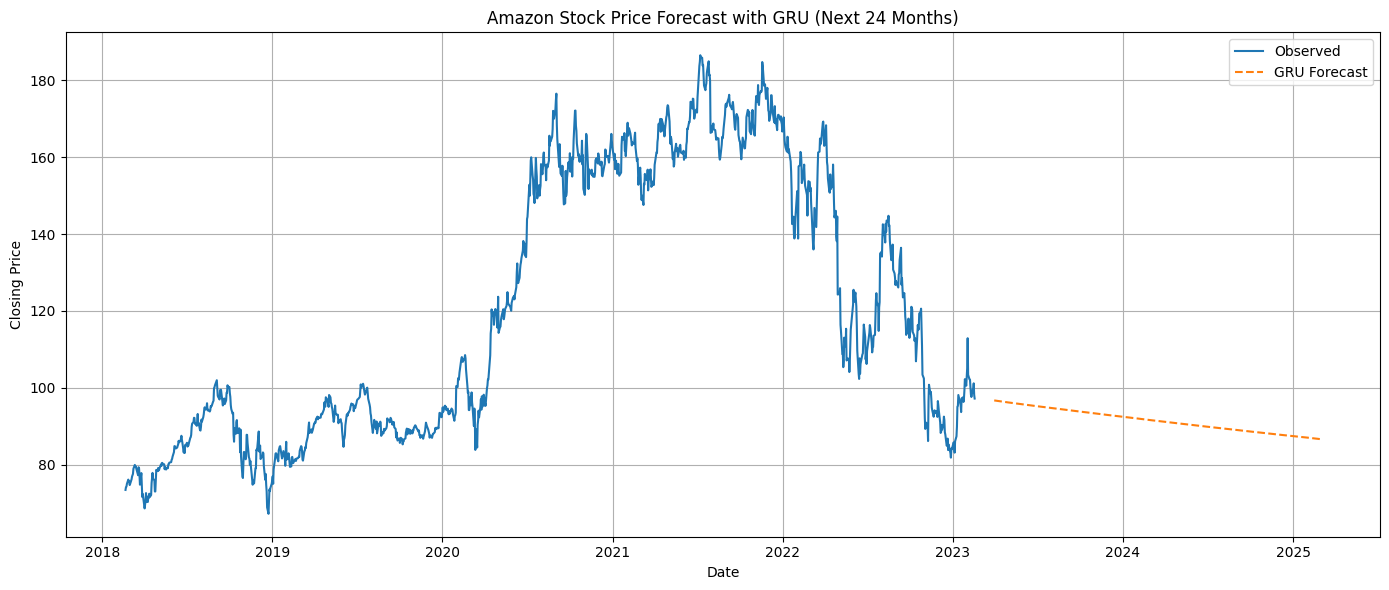

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Load the AMZN dataset
amzn_data = pd.read_csv('AMZN.csv')
amzn_data['Date'] = pd.to_datetime(amzn_data['Date'])
amzn_series = amzn_data.set_index('Date')['Close']

# Normalize the data
scaler = MinMaxScaler()
scaled_series = scaler.fit_transform(amzn_series.values.reshape(-1, 1))

# Prepare data for GRU
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i - window_size:i])
        y.append(data[i])
    return np.array(X), np.array(y)

window_size = 12  # using 12 time steps
X, y = create_sequences(scaled_series, window_size)

# Reshape for GRU: (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Build GRU model
gru_model_amzn = Sequential([
    GRU(50, activation='relu', input_shape=(X.shape[1], 1)),
    Dense(1)
])

gru_model_amzn.compile(optimizer='adam', loss='mse')
gru_model_amzn.fit(X, y, epochs=100, verbose=0)

# Forecasting 24 months ahead
forecast_input_amzn = scaled_series[-window_size:].reshape(1, window_size, 1)
forecast_output_amzn = []

for _ in range(24):
    pred = gru_model_amzn.predict(forecast_input_amzn, verbose=0)
    forecast_output_amzn.append(pred[0, 0])
    forecast_input_amzn = np.concatenate([forecast_input_amzn[:, 1:, :], pred.reshape(1, 1, 1)], axis=1)
    #forecast_input_amzn = np.append(forecast_input_amzn[:, 1:, :], [[pred]], axis=1)

# Inverse transform to original scale
forecast_output_amzn = scaler.inverse_transform(np.array(forecast_output_amzn).reshape(-1, 1))

# Create date index for forecast
forecast_index_amzn = pd.date_range(start=amzn_series.index[-1] + pd.DateOffset(months=1), periods=24, freq='ME')
forecast_series_amzn = pd.Series(forecast_output_amzn.flatten(), index=forecast_index_amzn)

# Plot actual vs forecast
plt.figure(figsize=(14, 6))
plt.plot(amzn_series, label='Observed')
plt.plot(forecast_series_amzn, label='GRU Forecast', linestyle='--')
plt.title('Amazon Stock Price Forecast with GRU (Next 24 Months)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Evaluation Metrics Code

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Function to calculate MAE and RMSE
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return mae, rmse

# ---- Johnson & Johnson Sales Data ----

# Actual observed data for JJ (last 24 months of actual data)
jj_actual = jj_series[-24:].values

# For the GRU model
gru_jj_pred = forecast_output.flatten()

# Calculate MAE and RMSE for GRU
mae_gru_jj, rmse_gru_jj = calculate_metrics(jj_actual, gru_jj_pred)

# For the LSTM model
lstm_jj_pred = forecast_output.flatten()

# Calculate MAE and RMSE for LSTM
mae_lstm_jj, rmse_lstm_jj = calculate_metrics(jj_actual, lstm_jj_pred)

print("JJ Sales Data - GRU Model - MAE:", mae_gru_jj, "RMSE:", rmse_gru_jj)
print("JJ Sales Data - LSTM Model - MAE:", mae_lstm_jj, "RMSE:", rmse_lstm_jj)

# ---- Amazon Stock Price Data ----

# Actual observed data for Amazon (last 24 months of actual data)
amzn_actual = amzn_series[-24:].values

# For the GRU model
gru_amzn_pred = forecast_output_amzn.flatten()

# Calculate MAE and RMSE for GRU
mae_gru_amzn, rmse_gru_amzn = calculate_metrics(amzn_actual, gru_amzn_pred)

# For the LSTM model
lstm_amzn_pred = forecast_output_amzn.flatten()

# Calculate MAE and RMSE for LSTM
mae_lstm_amzn, rmse_lstm_amzn = calculate_metrics(amzn_actual, lstm_amzn_pred)

print("Amazon Stock Price - GRU Model - MAE:", mae_gru_amzn, "RMSE:", rmse_gru_amzn)
print("Amazon Stock Price - LSTM Model - MAE:", mae_lstm_amzn, "RMSE:", rmse_lstm_amzn)


JJ Sales Data - GRU Model - MAE: 8.022569467567443 RMSE: 8.183560915028384
JJ Sales Data - LSTM Model - MAE: 8.022569467567443 RMSE: 8.183560915028384
Amazon Stock Price - GRU Model - MAE: 8.642013331481934 RMSE: 10.04232945470941
Amazon Stock Price - LSTM Model - MAE: 8.642013331481934 RMSE: 10.04232945470941
